In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
gender = pd.read_csv('gender_submission.csv')

### 1. Train Dataset

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.shape

(891, 12)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

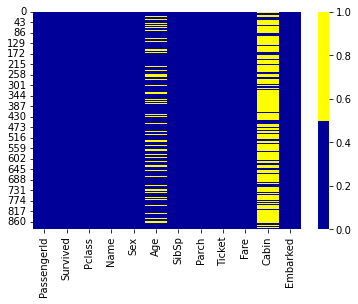

In [15]:
cols=train.columns
colours=['#000099','#ffff00']
sns.heatmap(train[cols].isnull(),
            cmap=sns.color_palette(colours))

Text(0.5, 1.0, 'Missing Value Proportion Each Feature')

<Figure size 576x288 with 0 Axes>

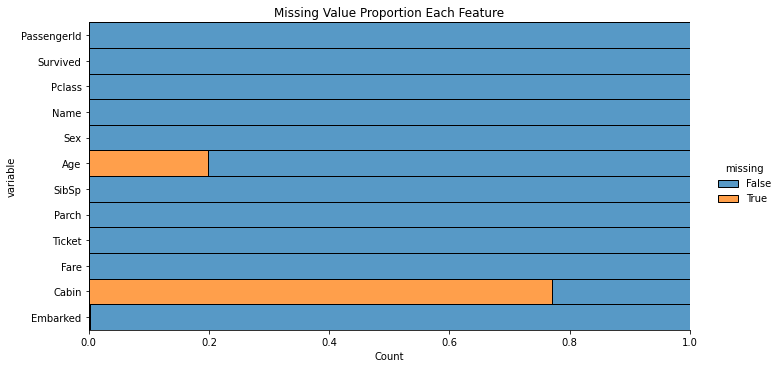

In [16]:
plt.figure(figsize=(8,4))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.title("Missing Value Proportion Each Feature")

In [17]:
train.duplicated().sum()

0

In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


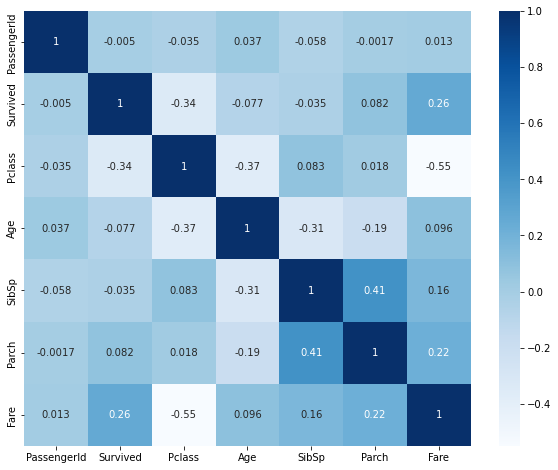

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data = train.corr(), annot = True, cmap = 'Blues')
plt.show()

In [20]:
train['Age'].fillna(train.Age.mean(),inplace = True)

In [21]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace =True)

In [23]:
train.drop('Cabin',inplace=True,axis=1)
train.drop('Name',inplace=True,axis=1)
train.drop('PassengerId',inplace=True,axis=1)
train.drop('Ticket',inplace=True,axis=1)

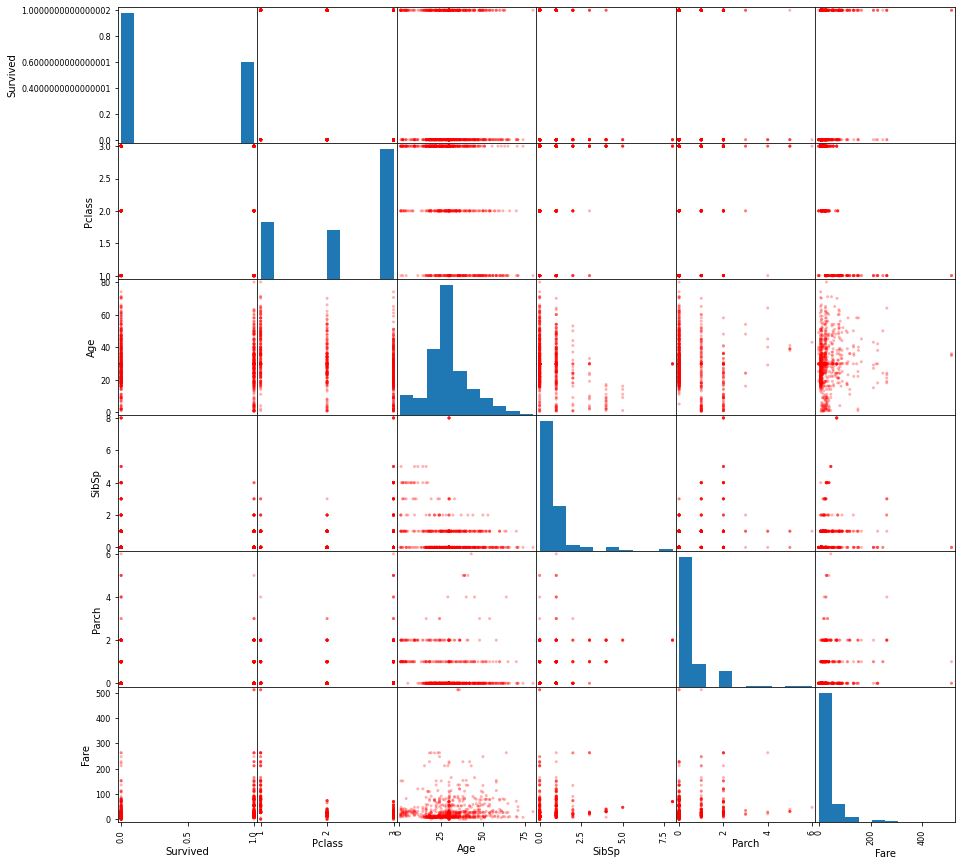

In [24]:
pd.plotting.scatter_matrix(train,figsize=(15,15),alpha=0.3,color='red')
plt.show()

In [25]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

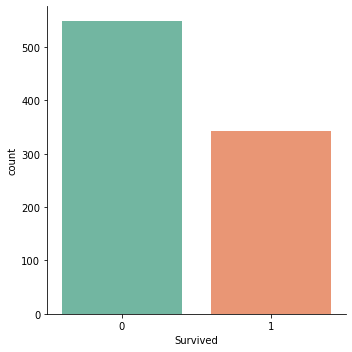

In [27]:
# Survived
train["Survived"].value_counts(normalize=True)
sns.catplot(x="Survived",kind="count", data = train, palette="Set2")

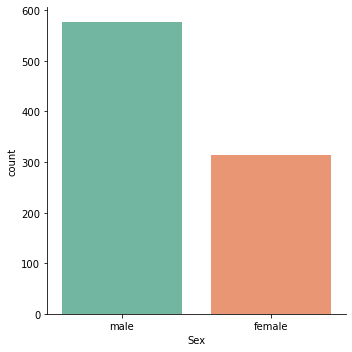

In [28]:
#Gender
train["Sex"].value_counts(normalize=True)
sns.catplot(x="Sex",kind="count", data = train, palette="Set2")

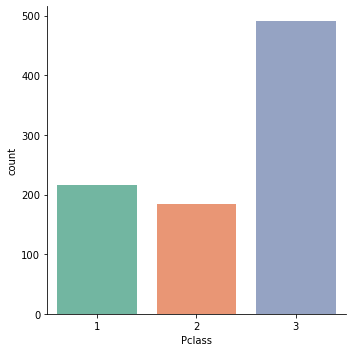

In [29]:
sns.catplot(x="Pclass",kind="count", data = train, palette="Set2")

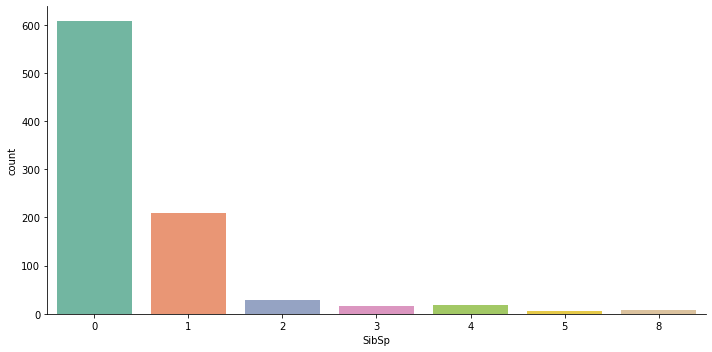

In [30]:
sns.catplot(x="SibSp",kind="count", data = train, palette="Set2",aspect=2)

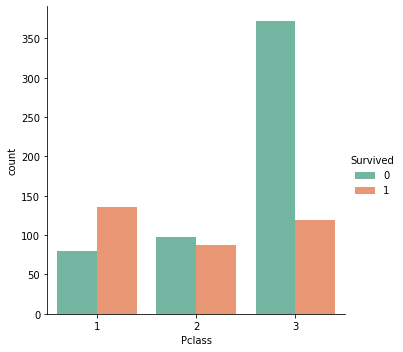

In [31]:
sns.catplot(x="Pclass",kind="count", hue = "Survived",data = train, palette="Set2")

C:\Users\POURNIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Embarked with respect to Survival')

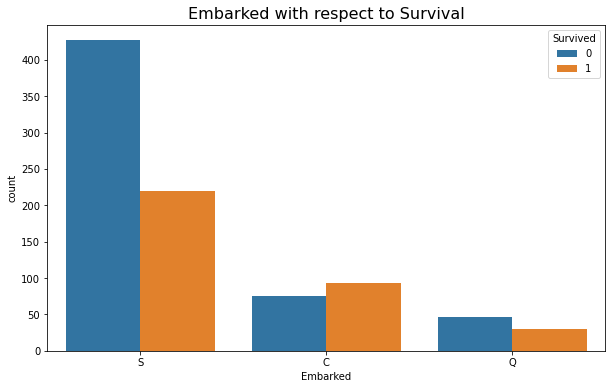

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Embarked'], hue= train['Survived'])
plt.title('Embarked with respect to Survival', size=16)

C:\Users\POURNIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of Parch with respect to Survival')

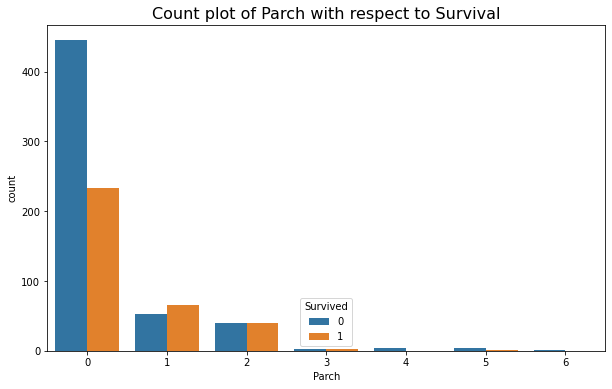

In [33]:
#Count plot of Parch with respect to Survival
plt.figure(figsize=(10, 6))
sns.countplot(train['Parch'], hue= train['Survived'])
plt.title('Count plot of Parch with respect to Survival', size=16)

C:\Users\POURNIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of SibSp with respect to Survival')

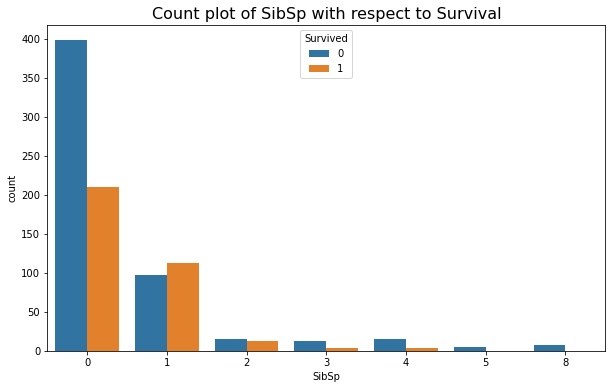

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(train['SibSp'], hue= train['Survived'])
plt.title('Count plot of SibSp with respect to Survival', size=16)

C:\Users\POURNIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of Sex with respect to Survival')

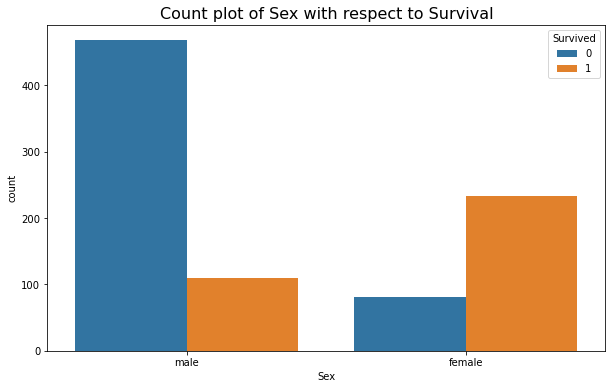

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Sex'], hue= train['Survived'])
plt.title('Count plot of Sex with respect to Survival', size=16)

In [36]:
train_num=train.select_dtypes(["int64","float64"])
train_cat=train.select_dtypes(object)

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in train_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    train_cat[col]=le.fit_transform(train_cat[col])

In [38]:
train1=pd.concat([train_num,train_cat],axis=1)
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [39]:
train1.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex           int32
Embarked      int32
dtype: object

### 2. Test dataset

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.shape

(418, 11)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [57]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

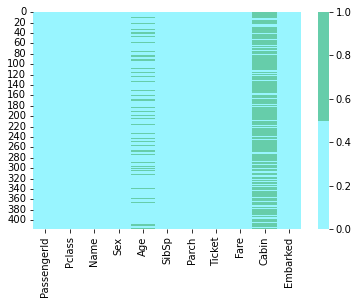

In [70]:
cols1=test.columns
colours1=['#98F5FF','#66CDAA']
sns.heatmap(test[cols1].isnull(),
            cmap=sns.color_palette(colours1))

Text(0.5, 1.0, 'Missing Value Proportion Each Feature')

<Figure size 576x288 with 0 Axes>

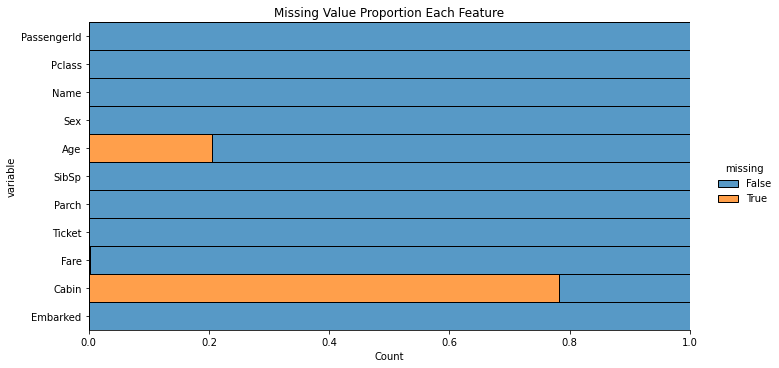

In [62]:
plt.figure(figsize=(8,4))
sns.displot(
    data=test.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.title("Missing Value Proportion Each Feature")

In [63]:
test.duplicated().sum()

0

In [64]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


<AxesSubplot:>

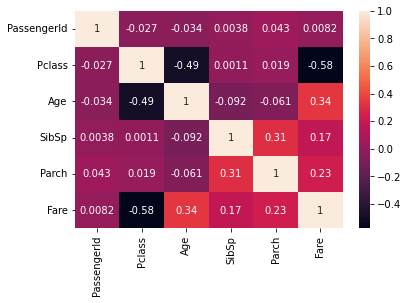

In [66]:
sns.heatmap(test.corr(),annot=True)

In [73]:
test['Age'].fillna(test.Age.mean(),inplace = True)

In [75]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [76]:
test['Embarked'].fillna(train['Embarked'].mode()[0],inplace =True)

In [78]:
test.drop('Cabin',inplace=True,axis=1)
test.drop('Name',inplace=True,axis=1)
test.drop('PassengerId',inplace=True,axis=1)
test.drop('Ticket',inplace=True,axis=1)

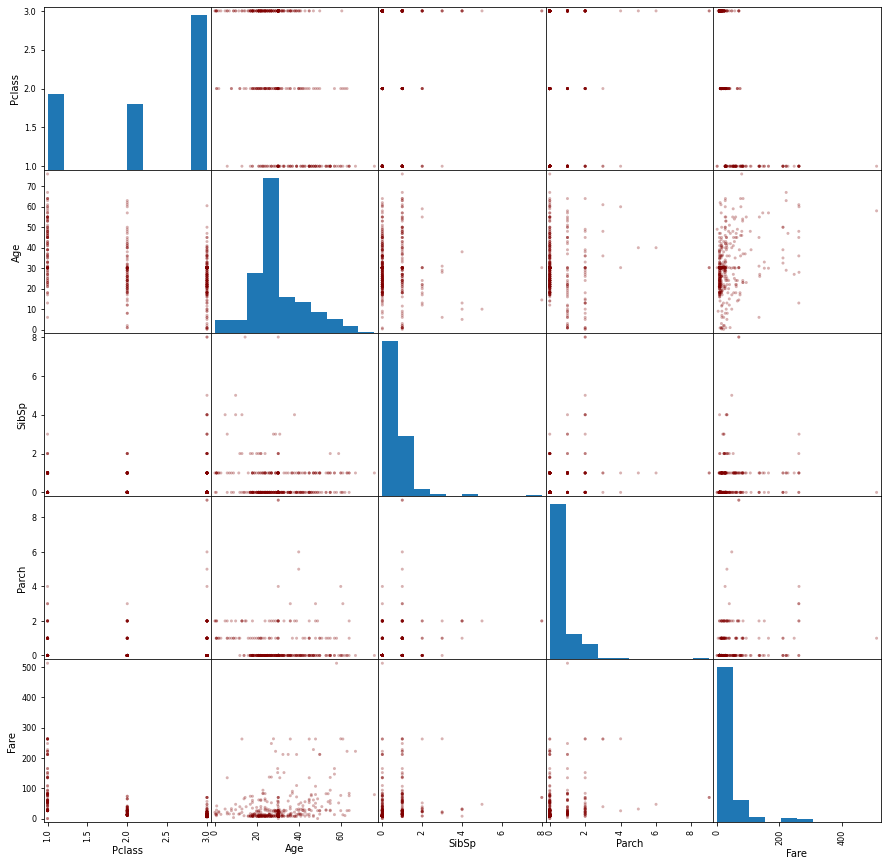

In [80]:
pd.plotting.scatter_matrix(test,figsize=(15,15),alpha=0.3,color='maroon')
plt.show()

In [88]:
test.loc[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [87]:
test['Fare'].fillna(test.Fare.mean(),inplace=True)

In [89]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 3. Gender details

In [91]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
gender.shape

(418, 2)

In [93]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [94]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [95]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [109]:
women = train.loc[train.Sex=='female']['Survived']
women_survived = round(sum(women)/len(women),3)
print('% of women survived = ',women_survived*100,'%')

% of women survived =  74.2 %


In [110]:
men = train.loc[train.Sex=='male']['Survived']
men_survived = round(sum(men)/len(men),3)
print('% of men survived = ',men_survived*100,'%')

% of men survived =  18.9 %


### 4. Model Building

In [134]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=True)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
